In [1]:
import os
import logging

#Set absl logging level to suppress warnings
logging.getLogger('absl').setLevel(logging.ERROR)

#Standard Data Packages
import pandas as pd
import numpy as np

#Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

#Scikit
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Other Packages
import joblib

## Load Datasets

In [2]:
#load dataset
train_set = pd.read_csv('../data/train_norm_set.csv')
val_set = pd.read_csv('../data/val_norm_set.csv')

In [3]:
#split into features & labels

features = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

X_train = train_set[features]
Y_train = train_set["Exited"]

X_val = val_set[features]
Y_val = val_set["Exited"]

In [4]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.470,0,0,0.472973,0.2,0.000000,0.333333,1,1,0.459140
1,0.512,0,1,0.081081,0.2,0.000000,0.000000,0,1,0.454370
2,0.566,1,1,0.351351,0.1,0.473928,0.000000,1,0,0.238851
3,0.504,1,1,0.297297,0.2,0.597701,0.333333,1,1,0.413466
4,0.590,0,1,0.175676,0.4,0.527510,0.000000,1,0,0.759450


## SVM Experiment 1

#### Fit and Evaluate on Train Data

Train set score: 0.8088778857889771
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     91072
           1       0.71      0.16      0.27     24451

    accuracy                           0.81    115523
   macro avg       0.76      0.57      0.58    115523
weighted avg       0.79      0.81      0.76    115523



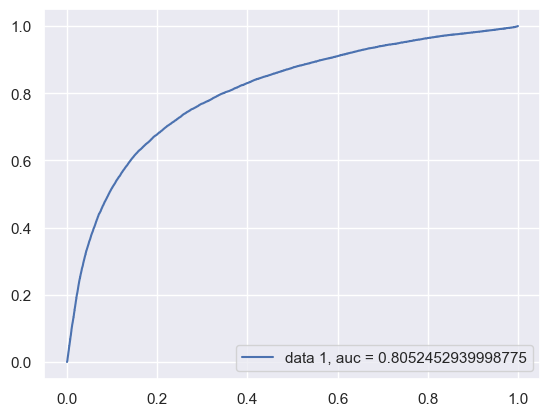

In [7]:
svm = SVC(kernel = "linear", C = 1, probability = True, random_state = 42)

svm.fit(X_train, Y_train)


#model evaluations
print("Train set score: " + str(svm.score(X_train, Y_train)))

predict_train = svm.predict(X_train)

print(metrics.classification_report(Y_train, predict_train))

#ROC Curve and AUC
y_pred_proba = svm.predict_proba(X_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_train,  y_pred_proba)
auc = metrics.roc_auc_score(Y_train, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

#### Make Predictions and Evaluate on Validation Data

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     39041
           1       0.72      0.17      0.27     10470

    accuracy                           0.81     49511
   macro avg       0.77      0.58      0.58     49511
weighted avg       0.80      0.81      0.76     49511



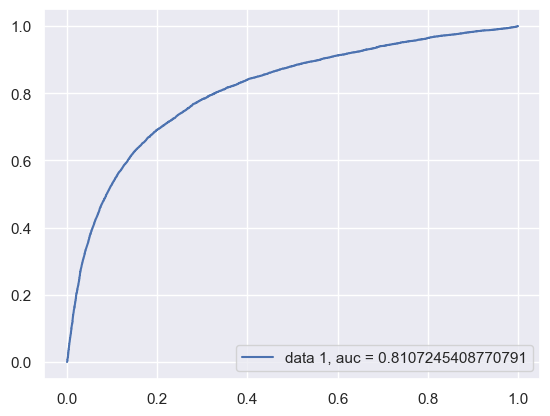

In [10]:
#make prediction on validation set
score_val = svm.score(X_val, Y_val)

predict_val = svm.predict(X_val)

#evaluate
print(metrics.classification_report(Y_val, predict_val))

y_pred_proba = svm.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

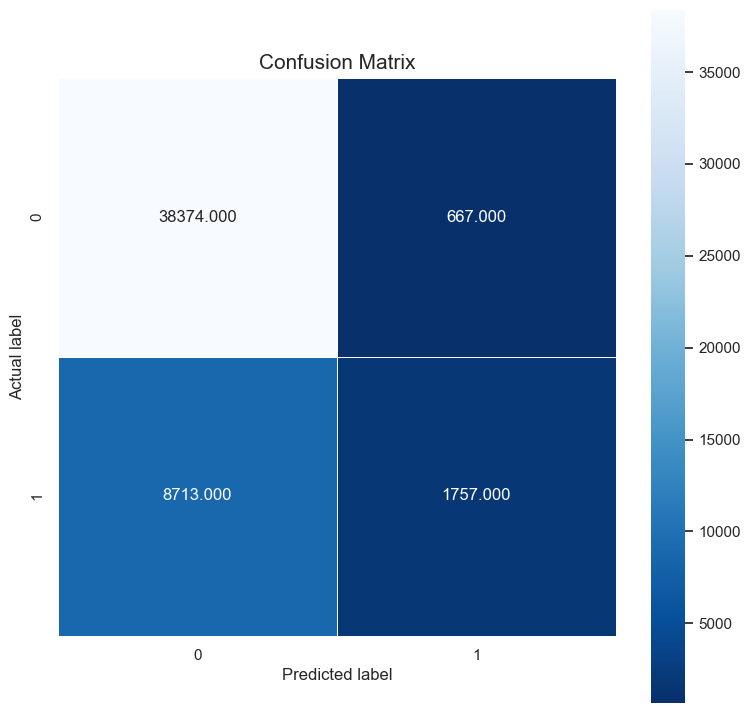

In [11]:
#plot confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

## SVM Experiment 2 (undersampled balanced dataset)

## Load Data

In [12]:
train_norm_balanced = pd.read_csv('../data/train_norm_balanced.csv')

X_train_balanced = train_norm_balanced[features]
Y_train_balanced = train_norm_balanced["Exited"]

#### Fit and Evaluate on Train Data

Train set score: 0.7413807206249233
              precision    recall  f1-score   support

           0       0.73      0.76      0.75     24451
           1       0.75      0.73      0.74     24451

    accuracy                           0.74     48902
   macro avg       0.74      0.74      0.74     48902
weighted avg       0.74      0.74      0.74     48902



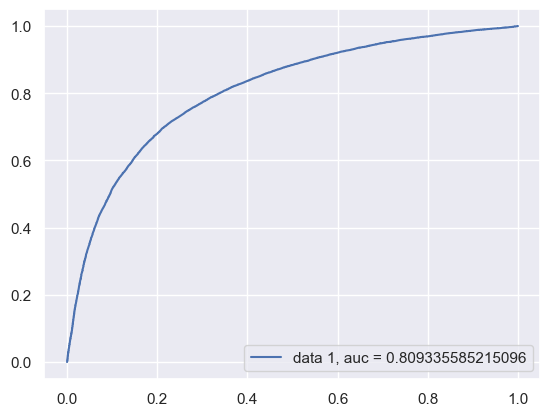

In [13]:
svm_balanced = SVC(kernel = "linear", C = 1, probability = True, random_state = 42)

svm_balanced.fit(X_train_balanced, Y_train_balanced)


#model evaluations
print("Train set score: " + str(svm_balanced.score(X_train_balanced, Y_train_balanced)))

predict_train = svm_balanced.predict(X_train_balanced)

print(metrics.classification_report(Y_train_balanced, predict_train))

#ROC Curve and AUC
y_pred_proba = svm_balanced.predict_proba(X_train_balanced)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_train_balanced,  y_pred_proba)
auc = metrics.roc_auc_score(Y_train_balanced, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

#### Make Predictions and Evaluate on Validation Data

              precision    recall  f1-score   support

           0       0.91      0.76      0.83     39041
           1       0.45      0.73      0.56     10470

    accuracy                           0.75     49511
   macro avg       0.68      0.75      0.69     49511
weighted avg       0.82      0.75      0.77     49511



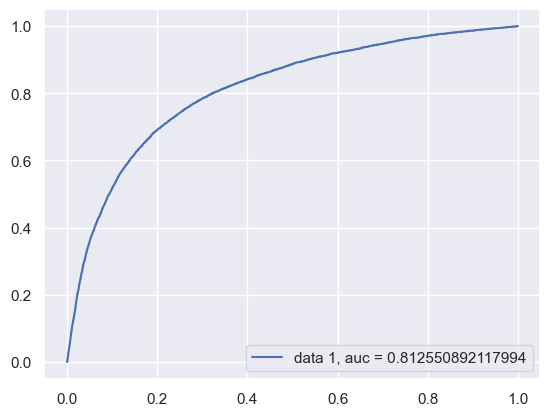

In [14]:
#make prediction on validation set
predict_val = svm_balanced.predict(X_val)

#evaluate
print(metrics.classification_report(Y_val, predict_val))

y_pred_proba = svm_balanced.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

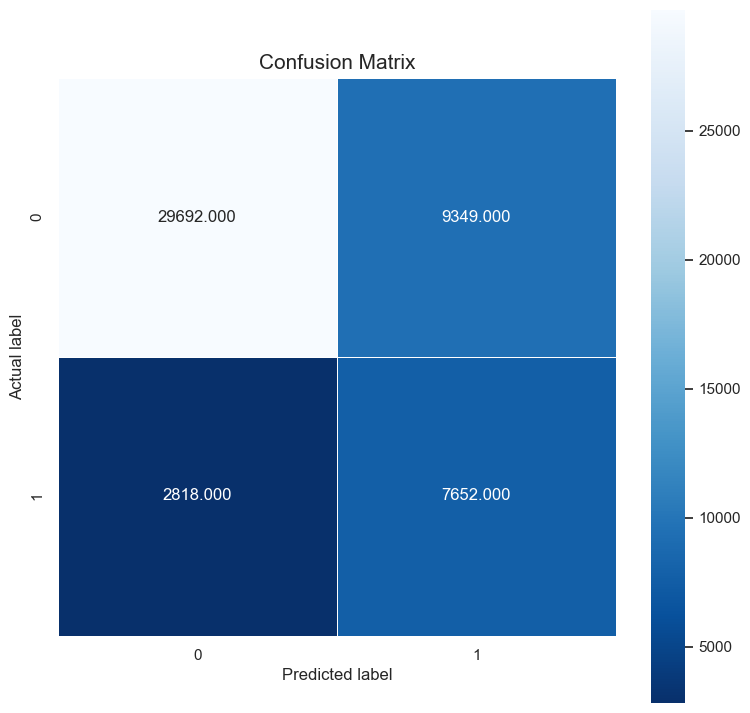

In [15]:
#plot confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

## SVM Cross Validation 1

#### Define parameters

In [16]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ["scale", "auto", 1, 0.1, 0.01, 0.001],
    'degree': [2, 3, 4]
}

#### Fit CV on Train Data

In [ ]:
#create model object
svm_func = SVC(random_state = 42)

#create grid search model
svm_cv = GridSearchCV(estimator = svm_func, param_grid = param_grid, cv = 3, scoring = "f1", verbose = 1)
#fit on training set
svm_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


#### Best Parameters from CV

In [ ]:
print(f"Best Score: {svm_cv.best_score_}, Best Param: {svm_cv.best_params_}")

## XGBoost Best Model (unbalanced)

#### Fit and Evaluate on Train Data

In [ ]:
#build and fit model
xgb_best_unbalanced = XGBClassifier(colsample_bytree = 1.0, learning_rate = 0.01, max_depth = 6, n_estimators = 1000, subsample = 0.6, random_state=42)

xgb_best_unbalanced.fit(X_train, Y_train)

predict_train = xgb_best_unbalanced.predict(X_train)

print(metrics.classification_report(Y_train, predict_train))

#ROC Curve and AUC
y_pred_proba = xgb_best_unbalanced.predict_proba(X_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_train,  y_pred_proba)
auc = metrics.roc_auc_score(Y_train, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

#### Make Predictions and Evaluate on Validation Data

In [ ]:
#make predictions
predict_val = xgb_best_unbalanced.predict(X_val)

#evaluate
print(metrics.classification_report(Y_val, predict_val))

y_pred_proba = xgb_best_unbalanced.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

## SVM Cross Validation 2 (undersampled balanced dataset)

## Fit CV on Train Data

In [ ]:
#create model object
svm_func = SVC(random_state = 42)

#create grid search model
svm_cv = GridSearchCV(estimator = svm_func, param_grid = param_grid, cv = 3, scoring = "f1", verbose = 1)
#fit on training set
svm_cv.fit(X_train_balanced, Y_train_balanced)

In [ ]:
print(f"Best Score: {svm_cv.best_score_}, Best Param: {svm_cv.best_params_}")

## XGBoost Best Model (undersampled balanced dataset)

#### Fit and Evaluate on Train Data

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     24451
           1       0.82      0.81      0.82     24451

    accuracy                           0.82     48902
   macro avg       0.82      0.82      0.82     48902
weighted avg       0.82      0.82      0.82     48902



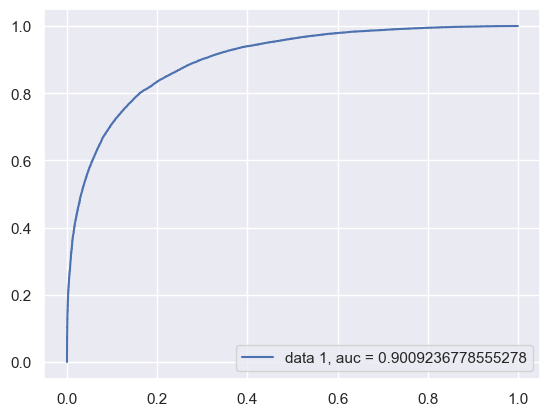

In [45]:
#build and fit model
xgb_best_balanced = XGBClassifier(colsample_bytree = 0.6, learning_rate = 0.1, max_depth = 3, n_estimators = 500, subsample = 0.6, random_state=42)

xgb_best_balanced.fit(X_train_balanced, Y_train_balanced)

predict_train = xgb_best_balanced.predict(X_train_balanced)

print(metrics.classification_report(Y_train_balanced, predict_train))

#ROC Curve and AUC
y_pred_proba = xgb_best_unbalanced.predict_proba(X_train_balanced)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_train_balanced,  y_pred_proba)
auc = metrics.roc_auc_score(Y_train_balanced, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

#### Make Predictions and Evaluate on Validation Data

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     39041
           1       0.53      0.80      0.64     10470

    accuracy                           0.81     49511
   macro avg       0.74      0.81      0.76     49511
weighted avg       0.85      0.81      0.82     49511



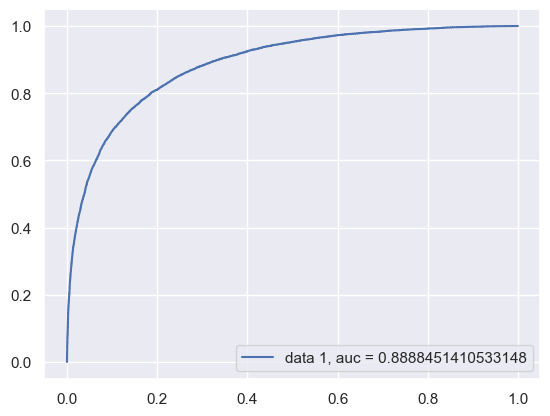

In [46]:
#make predictions
predict_val = xgb_best_balanced.predict(X_val)

#evaluate
print(metrics.classification_report(Y_val, predict_val))

y_pred_proba = xgb_best_balanced.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

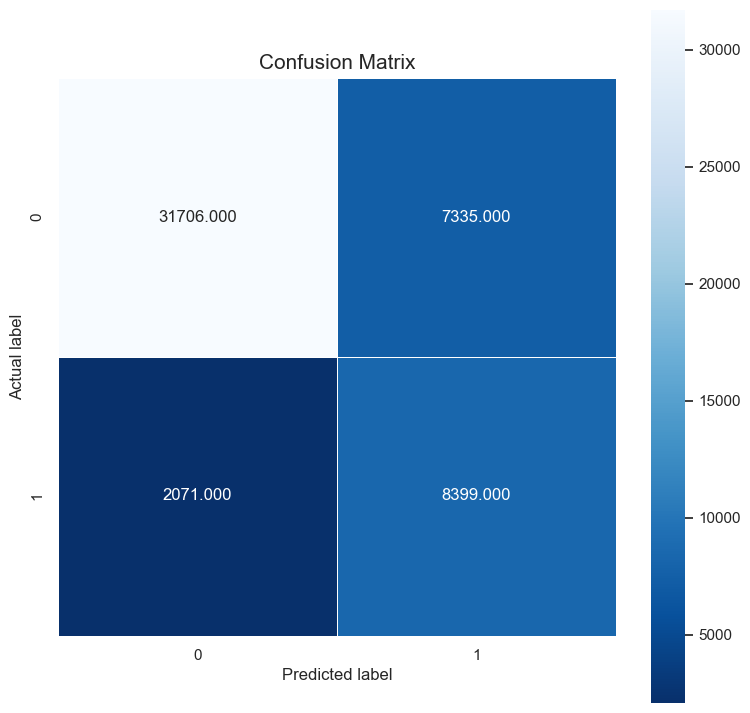

In [47]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

In [48]:
joblib.dump(xgb_best_unbalanced, "../models/xgb_best_unbalanced.joblib")
joblib.dump(xgb_best_balanced, "../models/xgb_best_balanced.joblib") 

['../models/xgb_best_balanced.joblib']